# Libraries

In [1]:
# Standard Libraries for Data Analysis
import numpy as np  # Linear Algebra
import pandas as pd # Data Frame
import scipy        # Statitiscal Analysis

# Visualizations Tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Transformation - standardise data
from sklearn.preprocessing import StandardScaler

# Clustering libraries - hierarchical and flat (k-means) clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Dimensionality reduction 
from sklearn.decomposition import PCA

# to export Data
import pickle

# Import Data

In [2]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

print(df_segmentation.shape)

(2000, 7)


# Explore Data
**

__Obs__:
- Sex: male, female = (0,1)
- Marital status: 
- Education: 
- Ocuupation: 
- Settlement size

**

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


### Summary of Data


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### Correlation Estimate
Pearson Correlation = default in Python

Correlation $\longrightarrow$ [-1,1], describe linear depency betwen  variables 
- 1, strong correlation 
- 0, there is no any linear correlation among variables
- -1, negative correlation, inverse proportionality between  variables

In [5]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1, 'Correlation Heatmap')

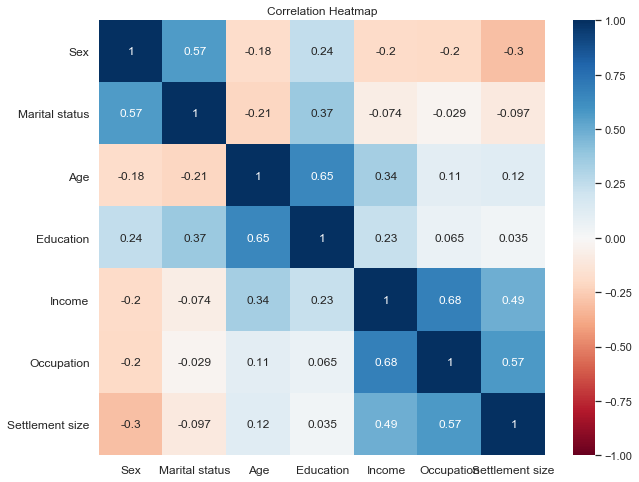

In [18]:
plt.figure(figsize = (10, 8))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0 , fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 0 , fontsize = 12)
plt.title('Correlation Heatmap')

Text(0.5, 1, 'Correlation Heatmap')

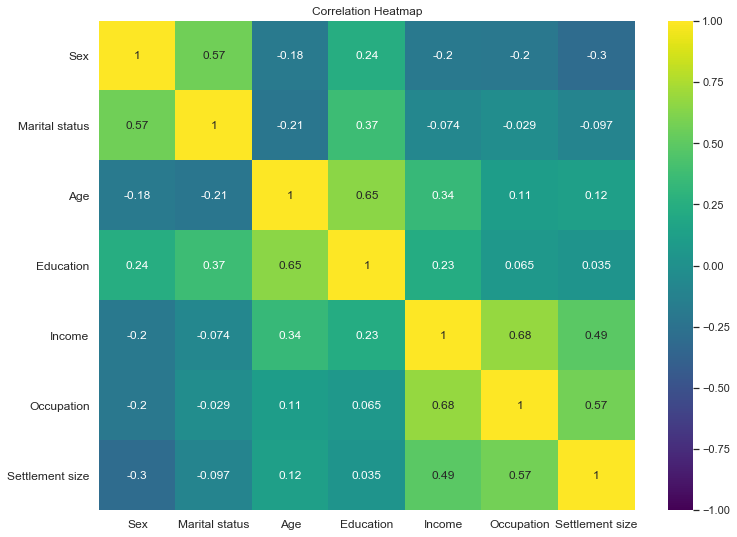

In [7]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               #annot = True,
               cmap = 'viridis',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0 , fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 0 , fontsize = 12)
plt.title('Correlation Heatmap')

Text(0.5, 1, 'Correlation Heatmap')

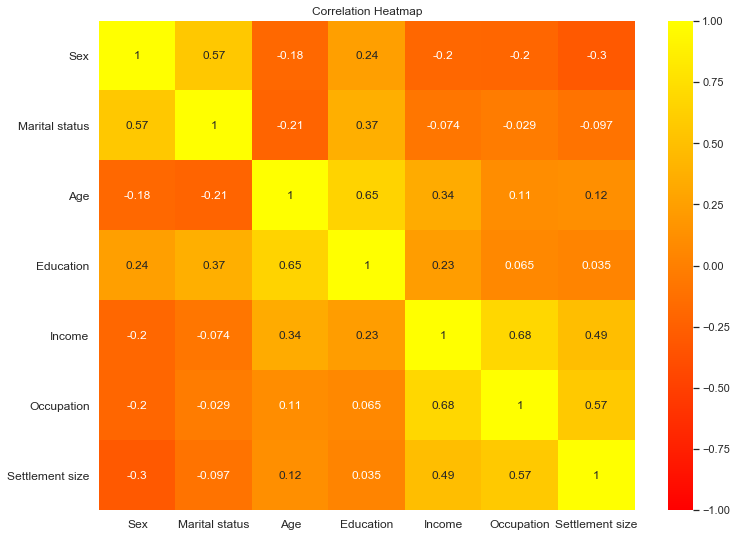

In [8]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'autumn',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0 , fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 0 , fontsize = 12)
plt.title('Correlation Heatmap')

Text(0.5, 1, 'Correlation Heatmap')

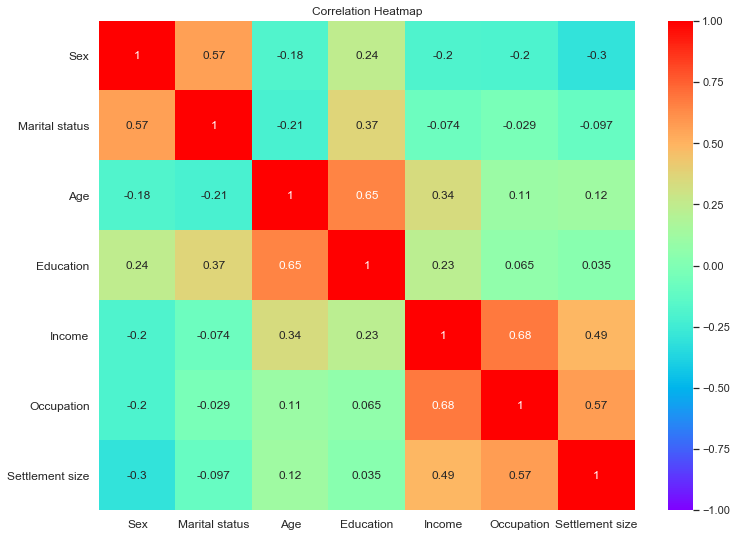

In [9]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'rainbow',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0 , fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 0 , fontsize = 12)
plt.title('Correlation Heatmap')

__Observation:__
- Exploring the correlation betwen the features is the first step to find __Similar Consumer__ put them into groups __is the Essence of Segmentation__.

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

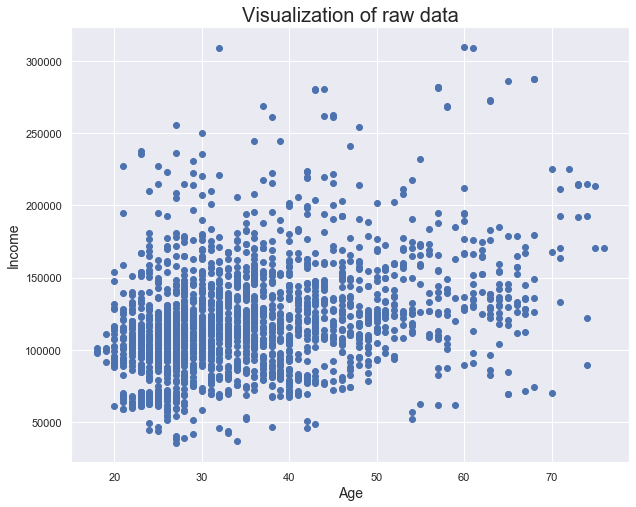

In [16]:
plt.figure(figsize= (10, 8))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Income', fontsize = 14)
plt.title('Visualization of raw data', fontsize= 20)


# Preprocessing
- It is need statistical preprocessing

### Standardise Data

In [11]:
scaler =  StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Clustering
Originaly, clustering was developed by ontropologist aiming at to explain origine of human being, adopted by psichologist, so on

Nowadays, there `two main Types of Clusterin` 
- Hierarchical - widely used to cluster in animal kngdom
    - Divise (Topdown)
    - Agglomerative (Bottom up) - `easier to solve mathematically` and reason for preference i implementation
        - Euclidean, Mahantan, etc distance
        - Ward method
- Flat - [K-Means]

### Hirarchical Clustering

In [12]:
hier_clust = linkage(segmentation_std, method = 'ward')

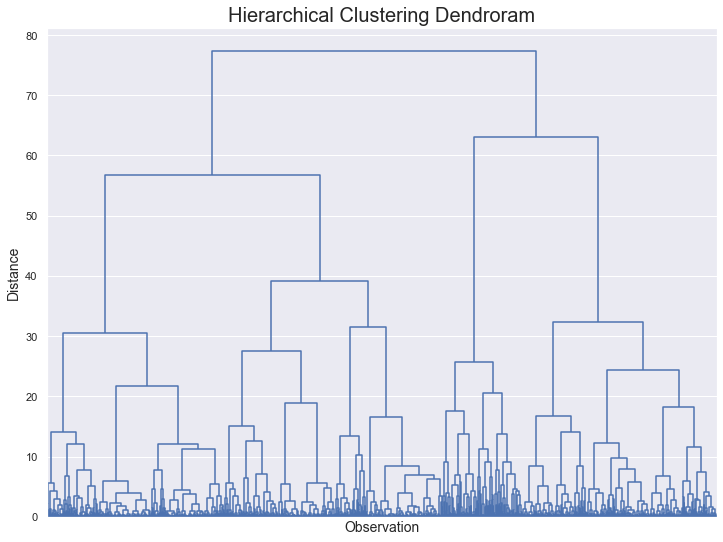

In [13]:
plt.figure(figsize = (12, 9))
plt.title('Hierarchical Clustering Dendroram', fontsize=20)
plt.xlabel('Observation', fontsize=14)
plt.ylabel('Distance', fontsize=14)
dendrogram(hier_clust,
          show_leaf_counts = False,
          no_labels = True,
          color_threshold = 0)
plt.show()

#### Truncate it little bit 
To make it more clear

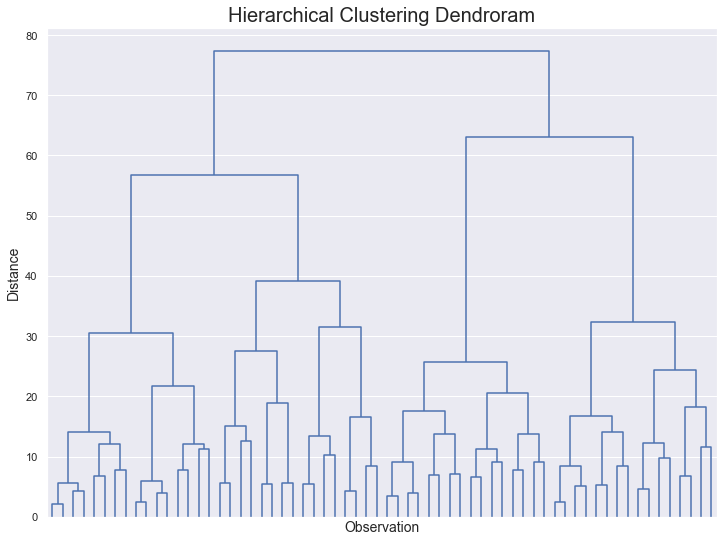

In [14]:
plt.figure(figsize = (12, 9))
plt.title('Hierarchical Clustering Dendroram', fontsize=20)
plt.xlabel('Observation', fontsize=14)
plt.ylabel('Distance', fontsize=14)
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
          no_labels = True,
          color_threshold = 0)
plt.show()

So, where to cut the tree in dendrogram?

There are rule of dump. Therefore, we the following:

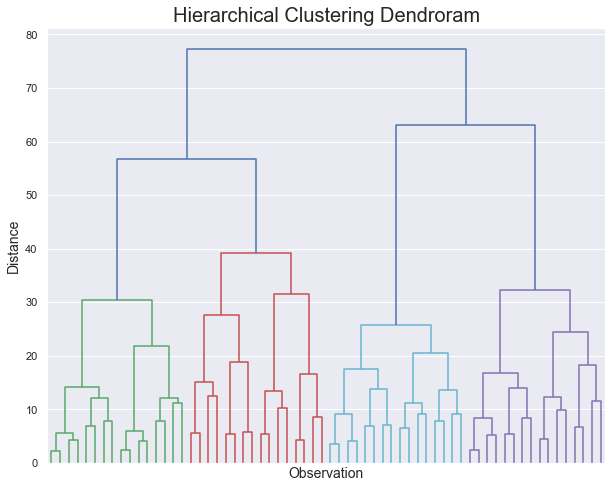

In [15]:
plt.figure(figsize = (10, 8))
plt.title('Hierarchical Clustering Dendroram', fontsize=20)
plt.xlabel('Observation', fontsize=14)
plt.ylabel('Distance', fontsize=14)
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
          no_labels = True)
plt.show()

### K-Means Clustering

In [16]:
wcss  = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                   random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-means Clusters')

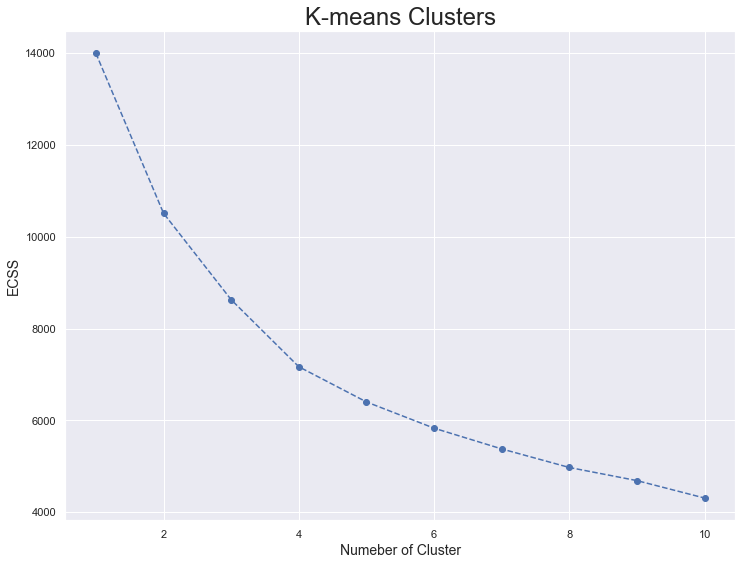

In [17]:
plt.figure(figsize = (12, 9))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Numeber of Cluster', fontsize = 14)
plt.ylabel('ECSS', fontsize = 14)
plt.title('K-means Clusters', fontsize =24)

In [18]:
kmeans  = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [19]:
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Results

In [20]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [21]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()

In [22]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


__Observation:__ name of different clusters [0,1,2,3]
- 0, `Well-off` $\longrightarrow$ higher income and education
- 1, `Fewer-opportunities` $\longrightarrow$ lower education, income, and live in smal cities
- 2, `Standard` $\longrightarrow$ younger, normal eucation and income, distributed in regions (cities - rural and cities)
- 3, `Career-Focused` $\longrightarrow$ lower education, higher income, live mainly in cities, maried and mainly men.


In [23]:
names_cluster = ['Well-off', 'Fewer-opportunities', 'Standard', 'Career-Focused']

In [24]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [25]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [26]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [27]:
df_segm_analysis.rename({0: 'well-off',
                        1: 'fewer opportunities',
                        2: 'standard',
                        3: 'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
career focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [28]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0: 'well-off',
                                                                  1: 'fewer opportunities',
                                                                  2: 'standard',
                                                                  3: 'career focused'})

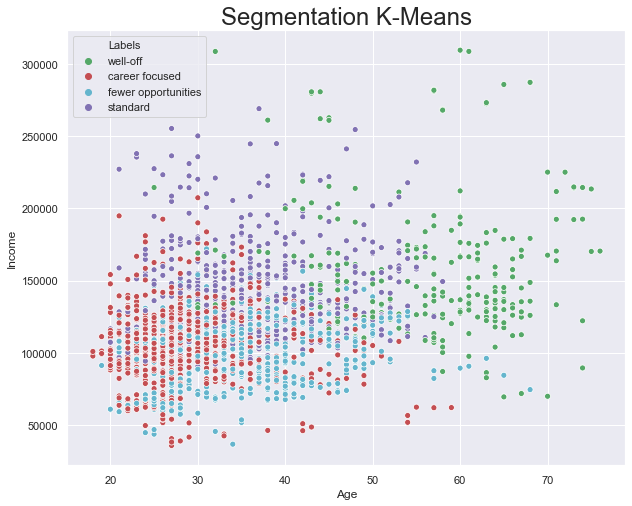

In [29]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-Means', fontsize = 24)
plt.show()

## PCA
    Rule of dump keep 70 to 80% of of the variance

In [30]:
pca = PCA()

In [31]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
# Check fo explainability of data
# of dimension reduction
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [33]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [34]:
pca.explained_variance_ratio_.cumsum()

array([0.35696328, 0.61947251, 0.80768365, 0.88326115, 0.94042627,
       0.97997421, 1.        ])

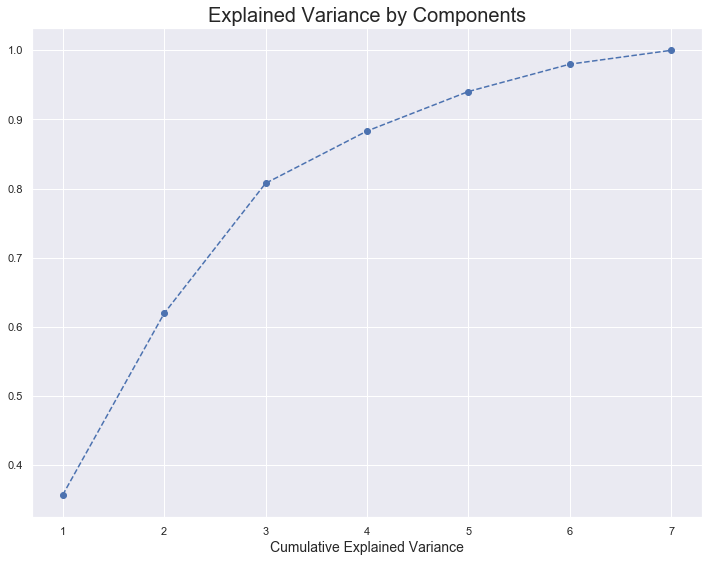

In [35]:
plt.figure(figsize = (12, 9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle = '--')
plt.title('Explained Variance by Components', fontsize = 20)
plt.xlabel('Number of Components', fontsize = 14)
plt.xlabel('Cumulative Explained Variance', fontsize = 14)
#plt.xlim([0,7.02])
#plt.ylim([0,1.02])
plt.show()

In [36]:
pca = PCA(n_components = 3)

In [37]:
pca.fit_transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

## PCA Results
    Loading: correlation between an original variable and a component

In [38]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [39]:
df_pca_comp =  pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [40]:
df_pca_comp.sum(axis=0)

Sex               -0.149702
Marital status    -0.121047
Age                1.247851
Education          1.072252
Income             0.483545
Occupation         0.111211
Settlement size    0.099472
dtype: float64

In [41]:
df_pca_comp.sum(axis=1)

Component 1    1.457913
Component 2    1.992365
Component 3   -0.706694
dtype: float64

([<matplotlib.axis.YTick at 0x1e6e1421940>,
 <a list of 3 Text yticklabel objects>)

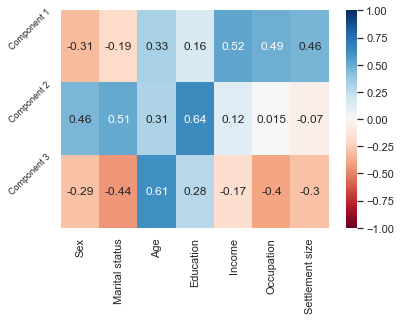

In [42]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)
plt.yticks([0, 1, 2],
          ['Component 1', 'Component 2', 'Component 3'], rotation = 45,
           fontsize = 9)

In [43]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [44]:
score_pca = pca.transform(segmentation_std)

## K-means Clustering with PCA

In [45]:
wcss  = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(score_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-means with PCA Clusters')

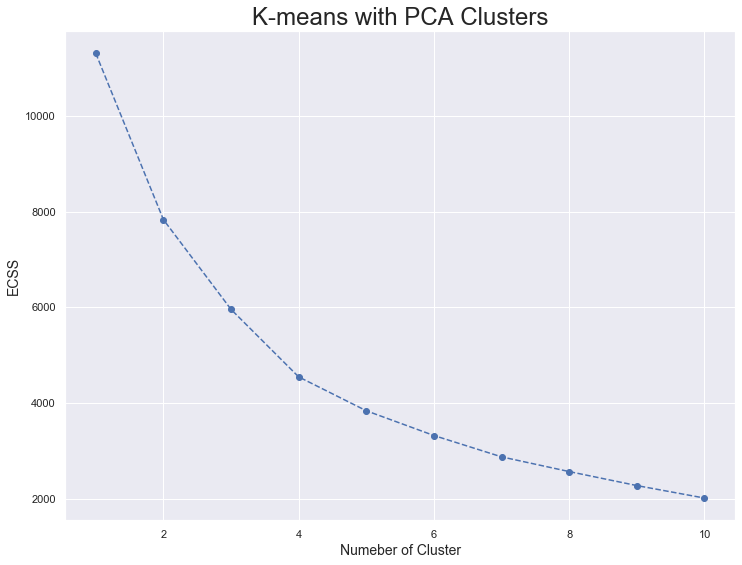

In [46]:
plt.figure(figsize = (12, 9))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Numeber of Cluster', fontsize = 14)
plt.ylabel('ECSS', fontsize = 14)
plt.title('K-means with PCA Clusters', fontsize =24)

In [47]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [48]:
kmeans_pca.fit(score_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## K-means Clustering with PCA Results

In [49]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True),
                                pd.DataFrame(score_pca)],
                                axis = 1)

In [50]:
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1',
                                          'Component 2',
                                          'Component 3']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [51]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [52]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


- `Component 1`: Career
- `Component 2`: Education Lifestyle
- `Component 3`: Experience

In [53]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()

df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0: 'stadard',
                                                     1: 'career focused',
                                                     2: 'fewer opportunities',
                                                     3: 'well-off'})

df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
stadard,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
career focused,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
fewer opportunities,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
well-off,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [54]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'stadard',
                                                                              1: 'career focused',
                                                                              2: 'fewer opportunities',
                                                                              3: 'well-off'})

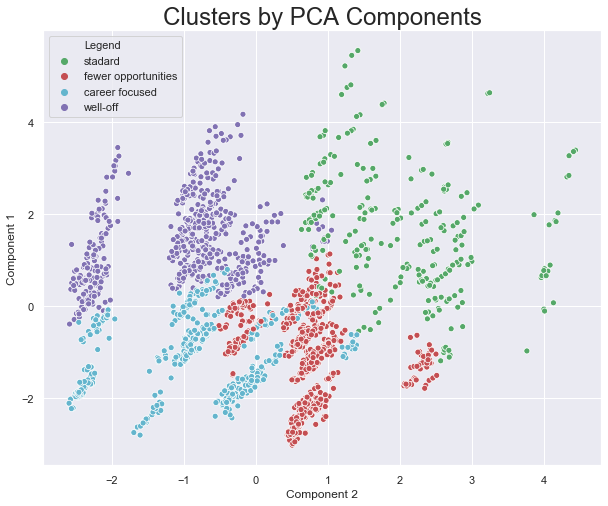

In [55]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], 
                palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components', fontsize = 24)
plt.show()

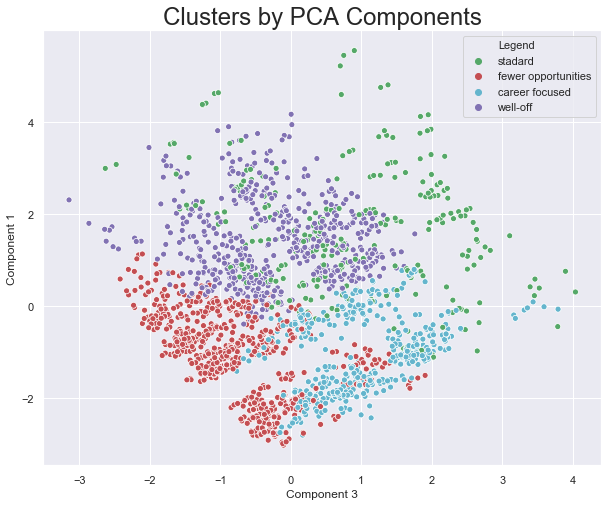

In [56]:
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], 
                palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components', fontsize = 24)
plt.show()

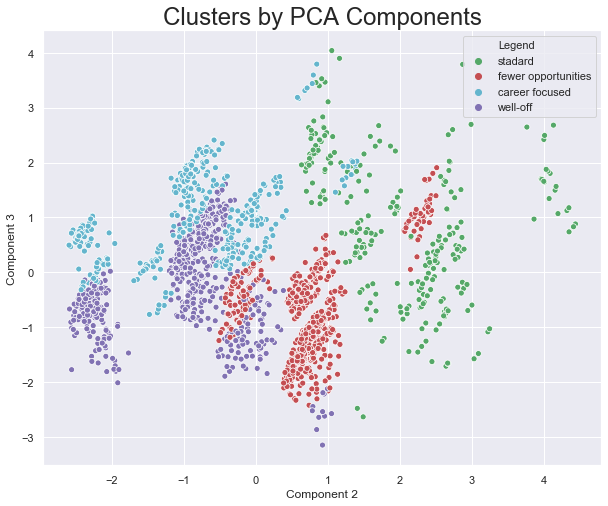

In [57]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], 
                palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components', fontsize = 24)
plt.show()

## Data Export
Last and import Step

In [58]:
# Export scaler (from Standard Scaler)
# 'wb' - means write bytes
pickle.dump(scaler, open('scaler.pickle', 'wb'))
# Needed for Purchase Analytics Preprocessing Sections

In [59]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [60]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))